<a href="https://colab.research.google.com/github/dalanocau/Taller-Program-1T/blob/main/TF1/TF1_Py_ALANOCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Instalar kaggle
!pip install -q kaggle

In [5]:
# Instalar gdown
!pip install -q gdown

# Descargar el archivo kaggle.json desde el enlace compartido de Drive a la carpeta content
!gdown --id 1WirGK7gCR7YJY7r0BqsQxMy08nxn6kYK -O /content/kaggle.json

# Mover el archivo a la ubicación requerida por la API de Kaggle
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verificar si la configuración de Kaggle funciona correctamente
!kaggle datasets list

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WirGK7gCR7YJY7r0BqsQxMy08nxn6kYK
To: /content/kaggle.json
100% 76.0/76.0 [00:00<00:00, 294kB/s]
ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset             10KB  2024-10-29 19:32:26           9436        173  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle data

In [6]:
# Se cargo API
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#Descarga de datos
!kaggle datasets download -d cnic92/200-financial-indicators-of-us-stocks-20142018 --unzip --force

Dataset URL: https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018
License(s): copyright-authors
 40% 6.00M/14.8M [00:00<00:00, 61.9MB/s]
100% 14.8M/14.8M [00:00<00:00, 103MB/s] 


In [8]:
import pandas as pd

# Cargar archivo CSV 2017_Financial_Data
data01 = pd.read_csv('2017_Financial_Data.csv')

data01.head(1)

Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0           0.0  1.865400e+10        1.865400e+10      1.376600e+10   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0       465000000.0  ...              0.0505           -0.0195       -0.0529   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.0012       0.0325                 0.0   

   SG&A Expenses Growth              Sector  2018 PRICE VAR [%]  Class  
0               -0.0156  Consumer Defensive            4.975151      1  

[1 rows x 225 columns]

In [9]:
#Verificar las dimensiones con Shape
data01.shape

(4960, 225)

In [10]:
#Renombrar la primera columna
data01.rename(columns={data01.columns[0]: 'EMPRESA'}, inplace=True)
data01.head(1)

EMPRESA       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0      PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0           0.0  1.865400e+10        1.865400e+10      1.376600e+10   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0       465000000.0  ...              0.0505           -0.0195       -0.0529   

   Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                       0.0012       0.0325                 0.0   

   SG&A Expenses Growth              Sector  2018 PRICE VAR [%]  Class  
0               -0.0156  Consumer Defensive            4.975151      1  

[1 rows x 225 columns]

In [11]:
# Identificar el tipo de cada variable
data01.dtypes

# Contar el número de variables de tipo object y no object
object_columns = data01.select_dtypes(include=['object']).columns
non_object_columns = data01.select_dtypes(exclude=['object']).columns

len(object_columns), len(non_object_columns)


(2, 223)

In [12]:
# Recategorización de variables de tipo object
for col in object_columns:
    data01[col] = pd.Categorical(data01[col]).codes

# Verificar la transformación
data01.dtypes


EMPRESA                   int16
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                     int8
2018 PRICE VAR [%]      float64
Class                     int64
Length: 225, dtype: object

In [13]:
# Contar casos por categoría para cada variable recategorizada
for col in object_columns:
    print(f"Categorías para {col}:")
    print(data01[col].value_counts())


Categorías para EMPRESA:
EMPRESA
3534    1
4199    1
1249    1
2474    1
2023    1
       ..
3246    1
1881    1
1722    1
1282    1
4862    1
Name: count, Length: 4960, dtype: int64
Categorías para Sector:
Sector
5     1247
6      718
9      665
7      595
2      520
0      282
4      266
8      264
3      199
10     110
1       94
Name: count, dtype: int64


In [14]:
# Verificar valores faltantes
valores_faltantes = data01.isnull().sum()
valores_faltantes


EMPRESA                   0
Revenue                 525
Revenue Growth          724
Cost of Revenue         679
Gross Profit            534
                       ... 
R&D Expense Growth      850
SG&A Expenses Growth    828
Sector                    0
2018 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

In [15]:
# Convertir el resultado a un DataFrame y resetear el índice
valores_faltantes = valores_faltantes[valores_faltantes > 0].reset_index()
valores_faltantes.columns = ['VARIABLE', 'CASOS']
valores_faltantes


VARIABLE  CASOS
0                        Revenue    525
1                 Revenue Growth    724
2                Cost of Revenue    679
3                   Gross Profit    534
4                   R&D Expenses    787
..                           ...    ...
216                 Asset Growth    792
217  Book Value per Share Growth    893
218                  Debt Growth    854
219           R&D Expense Growth    850
220         SG&A Expenses Growth    828

[221 rows x 2 columns]

In [37]:
#Crear un nuevo DataFrame con las columnas seleccionadas
data02 = data01[['EMPRESA', 'Revenue', 'Gross Profit', 'EBITDA', 'EBIT', 'ROE', 'Sector', 'Class']]
data02.head(1)

EMPRESA       Revenue  Gross Profit        EBITDA          EBIT     ROE  \
0     3534  6.505800e+10  3.242000e+10  2.167400e+10  1.885400e+10  0.2748   

   Sector  Class  
0       3      1

In [38]:
pd.options.mode.copy_on_write = True
#Renombrar la columna 'Gross Profit' a 'Gross_Profit' y verificar
data02.rename(columns={'Gross Profit': 'Gross_Profit'}, inplace=True)
data02.head(1)

EMPRESA       Revenue  Gross_Profit        EBITDA          EBIT     ROE  \
0     3534  6.505800e+10  3.242000e+10  2.167400e+10  1.885400e+10  0.2748   

   Sector  Class  
0       3      1

In [39]:
## Realizar un análisis descriptivo (medidas estadísticas y gráficos)
# Medidas estadísticas
descripcion = data02['Gross_Profit'].describe()
descripcion

count    4.426000e+03
mean     1.934378e+09
std      7.911822e+09
min     -8.138230e+08
25%      3.200000e+07
50%      1.993761e+08
75%      8.823762e+08
max      2.302870e+11
Name: Gross_Profit, dtype: float64

In [40]:
# Importar Matplotib y seaborn para gráficos estadísticos
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

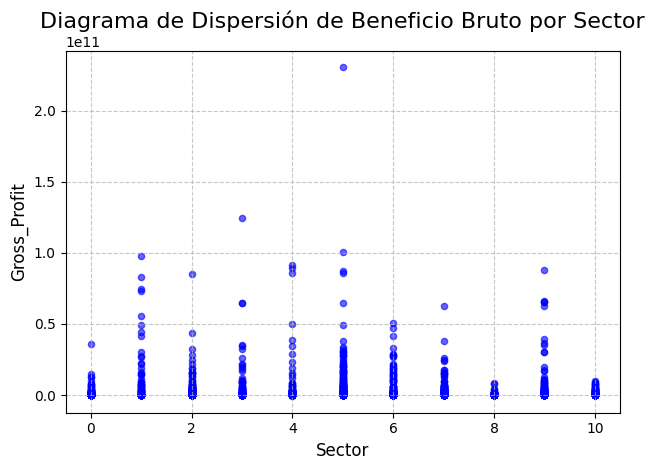

In [41]:
# Crear el gráfico de dispersión (scatterplot)
plt.figure(figsize=(10, 6))
data02.plot(kind='scatter', x='Sector', y='Gross_Profit', color='blue', alpha=0.6)

# Configuraciones del gráfico
plt.title('Diagrama de Dispersión de Beneficio Bruto por Sector', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Gross_Profit', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


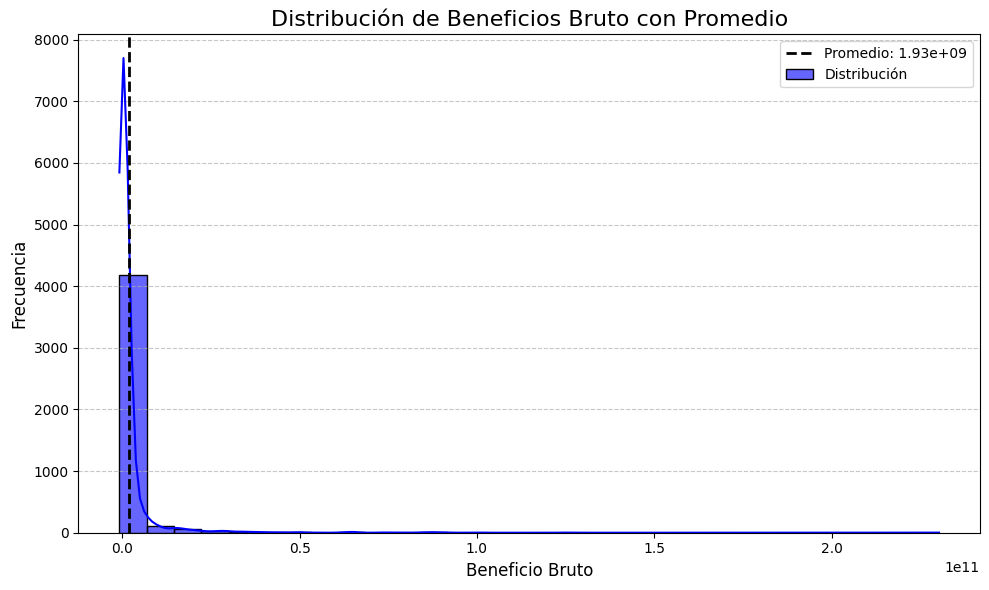

In [42]:
# Datos de la columna Gross_Profit
gross_profit = data02['Gross_Profit']

# Calcular el promedio
mean_value = gross_profit.mean()

# Crear el histograma con línea del promedio
plt.figure(figsize=(10, 6))
sns.histplot(gross_profit, bins=30, kde=True, color='blue', alpha=0.6, label='Distribución')

# Línea del promedio
plt.axvline(mean_value, color='black', linestyle='--', linewidth=2, label=f'Promedio: {mean_value:.2e}')

# Configuraciones del gráfico
plt.title('Distribución de Beneficios Bruto con Promedio', fontsize=16)
plt.xlabel('Beneficio Bruto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [22]:
!pip install ydata-profiling

In [23]:
from ydata_profiling import ProfileReport

In [24]:
# ejecutamos el reporte
ProfileReport(data02, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
# podemos exportar el reporte en formato html (solo en este formato). Luego de descargar el archivo generado, al abrirlo, se nos abre en el navegador
profile=ProfileReport(data02)
profile.to_file('Profiling_data02.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 9 5 ... 9 9 9]' has dtype incompatible with int16, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 2 2 ... 8 8 8]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
#verificar valores nulos
data02['Revenue'].isnull().sum()

525

In [44]:
# Verificar valores faltantes en cada columna
missing_columns = data02.columns[data02.isnull().sum() > 0]

# Crear nuevas columnas 'MARCA_XX' donde XX es el nombre de la columna original
for i, col in enumerate(missing_columns, 1):
    # Crear columna 'MARCA_XX' con 1 si el valor es faltante, 0 si no lo es
    data02[f'MARCA_{i}'] = data02[col].isnull().astype(int)

    # Verificar que la cantidad de valores faltantes sea la misma que la cantidad de 1s en la nueva columna
    assert data02[f'MARCA_{i}'].sum() == data02[col].isnull().sum(), f"Desajuste en la columna {col}"



In [46]:
 # Verificar el número de faltantes en 'Revenue'
 data02[data02['MARCA_1'] == 1].shape[0]

525

In [48]:
# Crear una lista para almacenar los resultados de la verificación
verificaciones = []

# Iterar por cada columna con valores faltantes
for i, col in enumerate(missing_columns, 1):
    # Obtener la columna de la marca creada
    marca_col = f'MARCA_{i}'

    # Contar valores faltantes y comparar con los valores 1 en la marca
    valores_faltantes_original = data02[col].isnull().sum()
    valores_marca = data02[marca_col].sum()

    # Verificar coincidencia
    verificado = valores_faltantes_original == valores_marca
    verificaciones.append((col, marca_col, valores_faltantes_original, valores_marca, verificado))

# Convertir los resultados en un DataFrame para visualizarlos fácilmente
resultados_verificacion = pd.DataFrame(verificaciones, columns=['Variable Original', 'Marca', 'Faltantes Original', 'Suma Marca', 'Verificado'])
resultados_verificacion


Variable Original    Marca  Faltantes Original  Suma Marca  Verificado
0           Revenue  MARCA_1                 525         525        True
1      Gross_Profit  MARCA_2                 534         534        True
2            EBITDA  MARCA_3                 666         666        True
3              EBIT  MARCA_4                 592         592        True
4               ROE  MARCA_5                 841         841        True